# [CSCI 3399] Lab 2a: Gradient Decent

**Posted:** Sunday, Feb 11, 2024

**Due:** Sunday, Feb 18, 2024

__Total Points__: 2 pts

__Submission__: please rename the .ipynb file as __\<your_username\>\_lab2a.ipynb__ before you submit it to canvas. Example: yuanyua_lab2a.ipynb.

# <b>1. Optimization</b>


## 1.1 Gradient Descent (GD)
Let's implement the gradient descend method to find the minimum value for the function $g(x) = 0.066x^4-0.32x^3-0.85x^2+ 4.2x+8.2$. With the chosen learning rate, GD gets stuck at a local optima.

initial result: x=5.50, g(x)=12.74
final result: x=4.27, g(x)=7.66


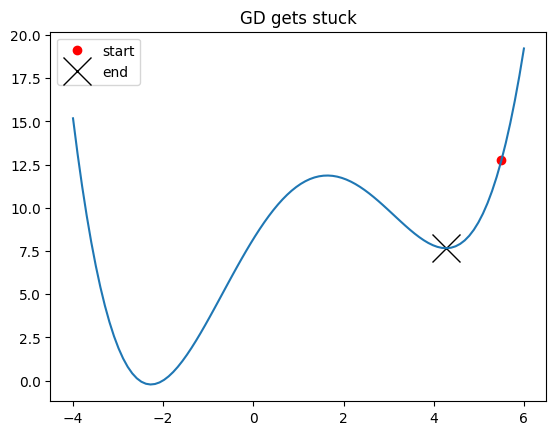

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## function definition
def g(x):
  # return the value of the defined g(x) at value x
  return 8.2 + 4.2*x**1 -0.85*x**2 -0.32*x**3+ 0.066*x**4

def Dg(x):
  # return the value of the gradient of the defined g(x) at value x
  return 4.2 -1.7*x -0.96*x**2+ 0.264*x**3

## gradient descent
def optimizer_grad_descent(x0, grad, alpha = 0.1, num_step = 100, x_ran=None):
  for x in range(num_step):
    # gradient descent update
    x0 = x0 - alpha * grad(x0)
    if x_ran is not None:
      # clip the value
      x0 = np.clip(x0, x_ran[0], x_ran[1])
  return x0

# find the minimum value within x_ran, starting from x0
x_ran = [-4, 6]
x0 = 5.5
x1 = optimizer_grad_descent(x0, Dg, alpha = 0.1, x_ran = x_ran)

# plot result
print('initial result: x=%.2f, g(x)=%.2f' %(x0, g(x0)))
print('final result: x=%.2f, g(x)=%.2f' %(x1, g(x1)))
xx = np.linspace(*x_ran, 100)

plt.plot(x0,g(x0), 'ro')
plt.plot(x1,g(x1), 'kx', markersize=20)
plt.legend(['start', 'end'])
plt.plot(xx, g(xx))
plt.title('GD gets stuck')
plt.show()

## 1.2 [2 pts] Exercise: GD+Momentum
Let's implement a better optimization method: "gradient descend with momentum" method described in [distill.pub paper](https://distill.pub/2017/momentum/).
The high-level idea is that instead of trusting the current gradient 100%, we can linearly combine the previous gradients (i.e., carry on the momemtum) and the current gradient. With this, it can stabilize the search moves (e.g., not affected by noisy local gradient) and get out of stuck of the local optima where the current graident is 0.

Here's the new Update formula:
- $z^{k+1}=\beta z^{k}+ \dfrac{dg}{dx}(x^{k})$
- $x^{k+1}=x^{k} -\alpha z^{k+1}$

Note that, if $\beta=0$, the update rule is the same as the gradient descent method.

Let's implement it and find the global mimina for this function.

initial result: x=5.50, g(x)=12.74
final result: x=4.27, g(x)=7.66


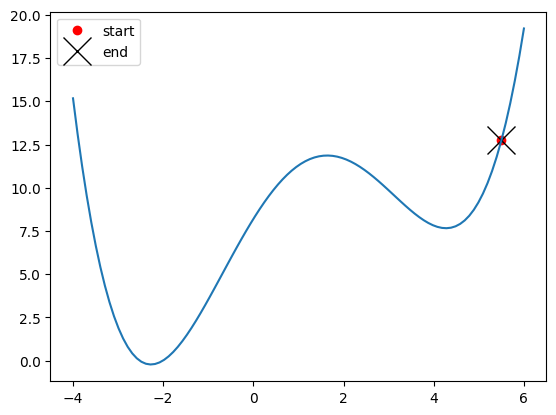

In [4]:
## gradient descent with momemtum
def optimizer_grad_descent_momentum(x0, grad, alpha = 0.1, beta = 0.99, num_step = 100, x_ran=None):
    z0 = 0
    for x in range(num_step):
        # gradient descend with momentum update

        ### Your code starts here
        
        ### Your code ends here

        if x_ran is not None:
            # clip the value
            x0 = np.clip(x0, x_ran[0], x_ran[1])
    return x0

# find the minimum value within x_ran, starting from x0
x_ran = [-4, 6]
x0 = 5.5
x2 = optimizer_grad_descent_momentum(x0, Dg, x_ran = x_ran)

# plot result
print('initial result: x=%.2f, g(x)=%.2f' %(x0, g(x0)))
print('final result: x=%.2f, g(x)=%.2f' %(x1, g(x1)))
xx = np.linspace(*x_ran, 100)
plt.plot(x0,g(x0), 'ro')
plt.plot(x2,g(x2), 'kx', markersize=20)
plt.legend(['start', 'end'])
plt.plot(xx, g(xx))
plt.show()